In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesDate_p', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.753 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.491 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.065 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.049 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.614 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.987 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.201 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

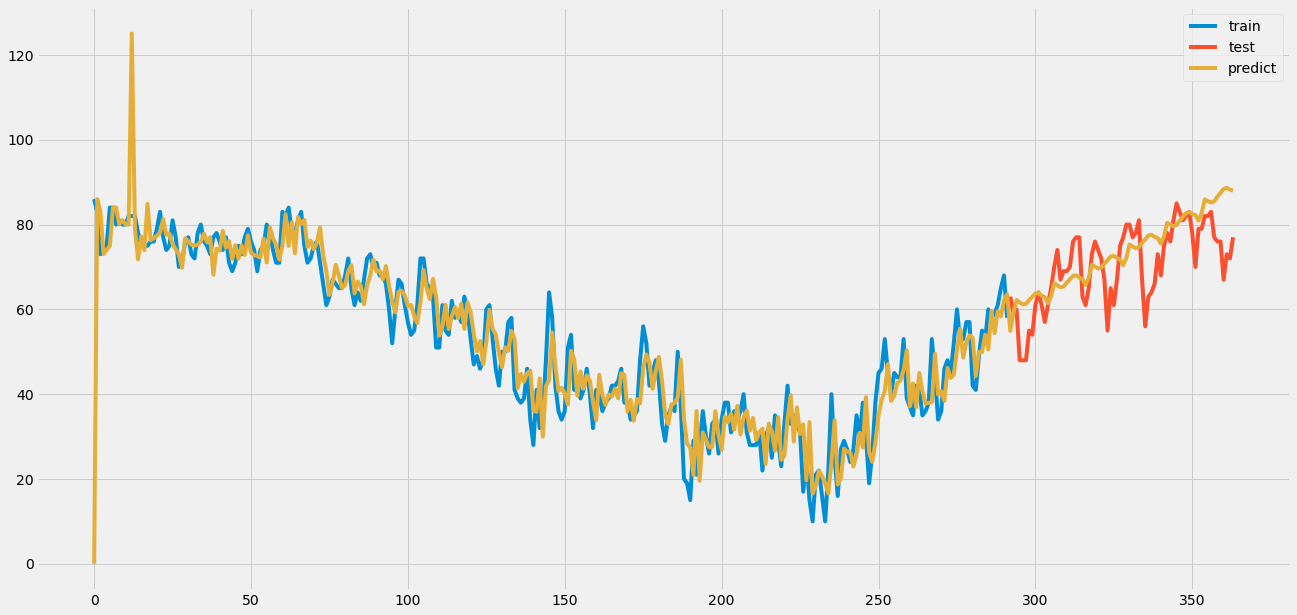

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.25  Num NaN: 0'

'Test Error: 4.98333333333    Num NaN: 0'

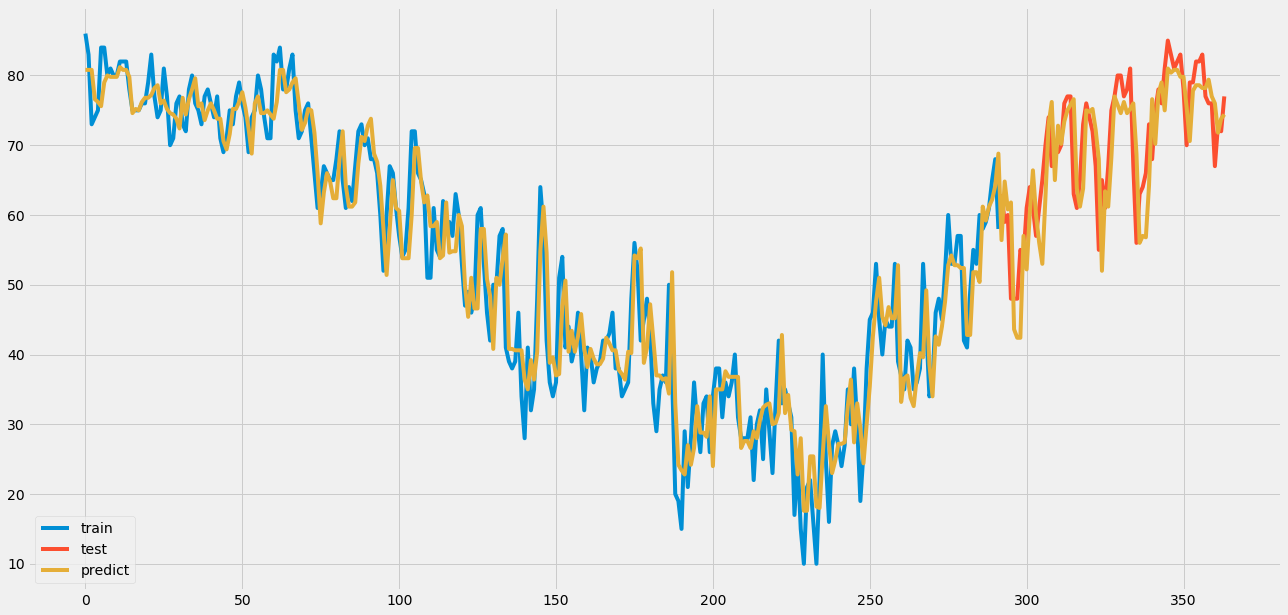

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 5.54996091455e+13  Num NaN: 0'

'Test Error: 3.48140517022e+13    Num NaN: 0'

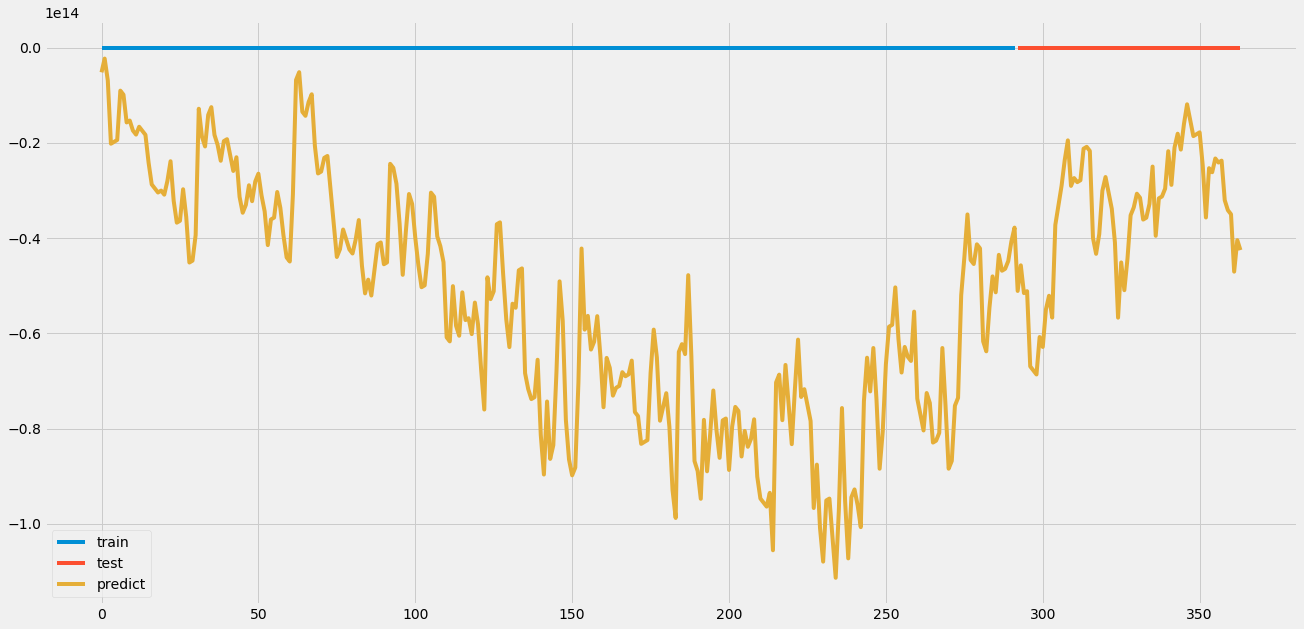

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 1.99623287671  Num NaN: 0'

'Test Error: 4.81111111111    Num NaN: 0'

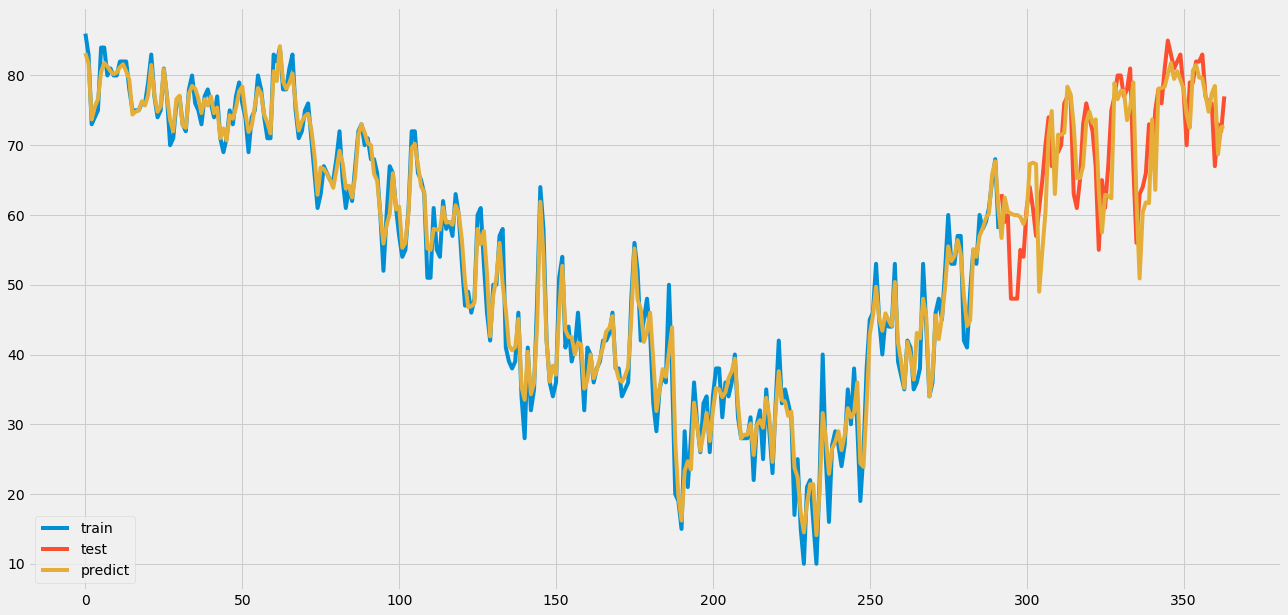

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.55346209032  Num NaN: 0'

'Test Error: 4.60888808365    Num NaN: 0'

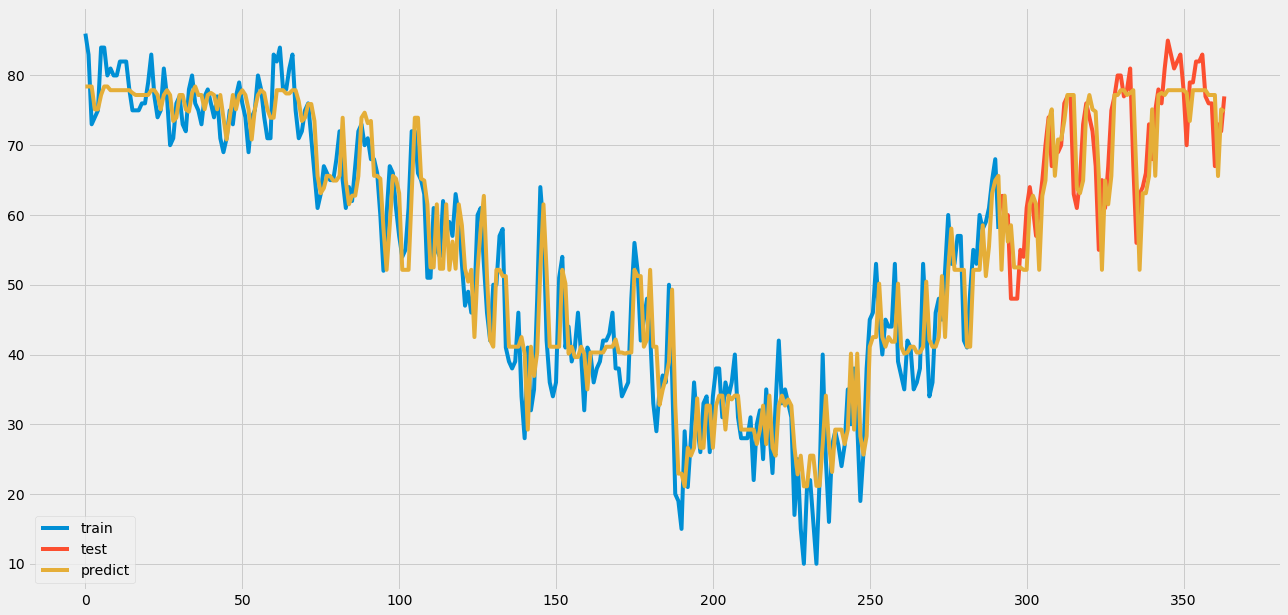

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 3.80361966581e-09  Num NaN: 0'

'Test Error: 65.114388709    Num NaN: 0'

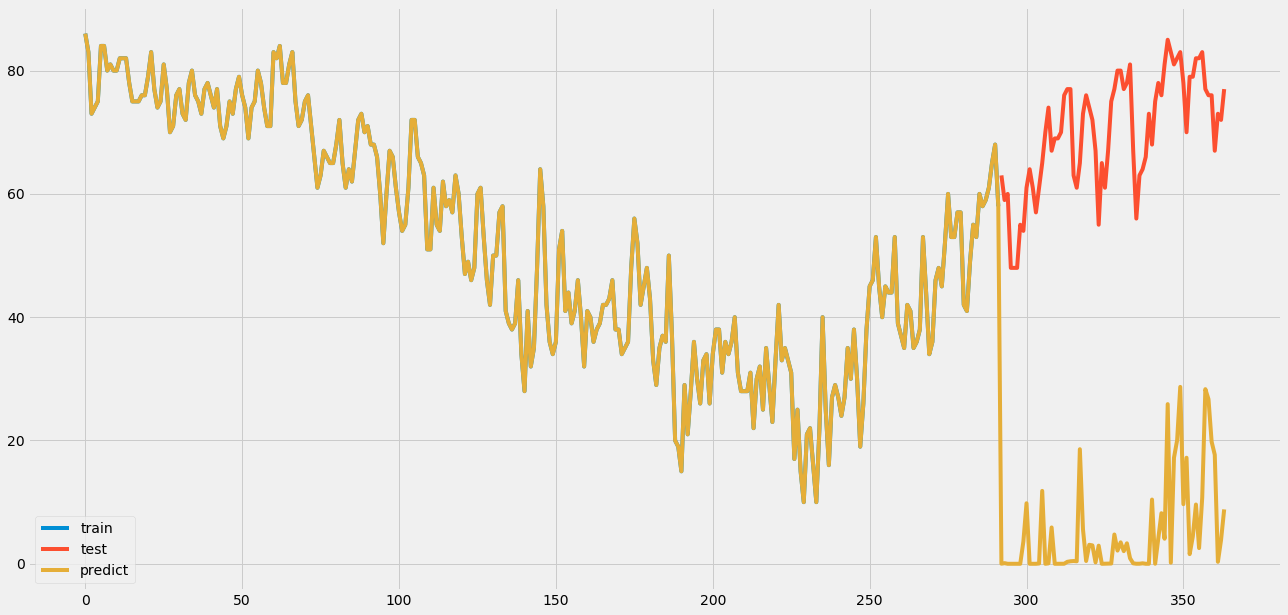

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.50764140048  Num NaN: 5'

'Test Error: 6.72045814319    Num NaN: 5'

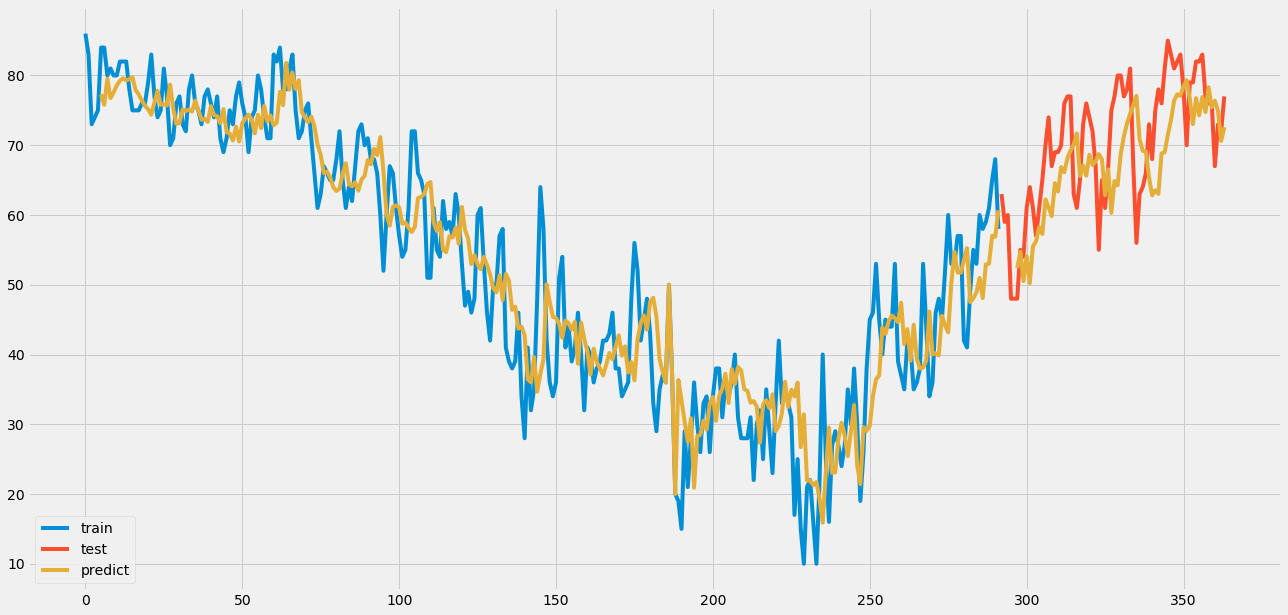

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2234 - val_loss: 0.2221
Epoch 2/10
 - 0s - loss: 0.2195 - val_loss: 0.2184
Epoch 3/10
 - 0s - loss: 0.2212 - val_loss: 0.2272
Epoch 4/10
 - 0s - loss: 0.2207 - val_loss: 0.2931
Epoch 5/10
 - 0s - loss: 0.2238 - val_loss: 0.2978
Epoch 6/10
 - 0s - loss: 0.2253 - val_loss: 0.2827
Epoch 7/10
 - 0s - loss: 0.2223 - val_loss: 0.2962
Epoch 8/10
 - 0s - loss: 0.2209 - val_loss: 0.2635
Epoch 9/10
 - 0s - loss: 0.2209 - val_loss: 0.2633
Epoch 10/10
 - 0s - loss: 0.2213 - val_loss: 0.2343


'Train Error: 16.5591108874  Num NaN: 5'

'Test Error: 17.570021729    Num NaN: 5'

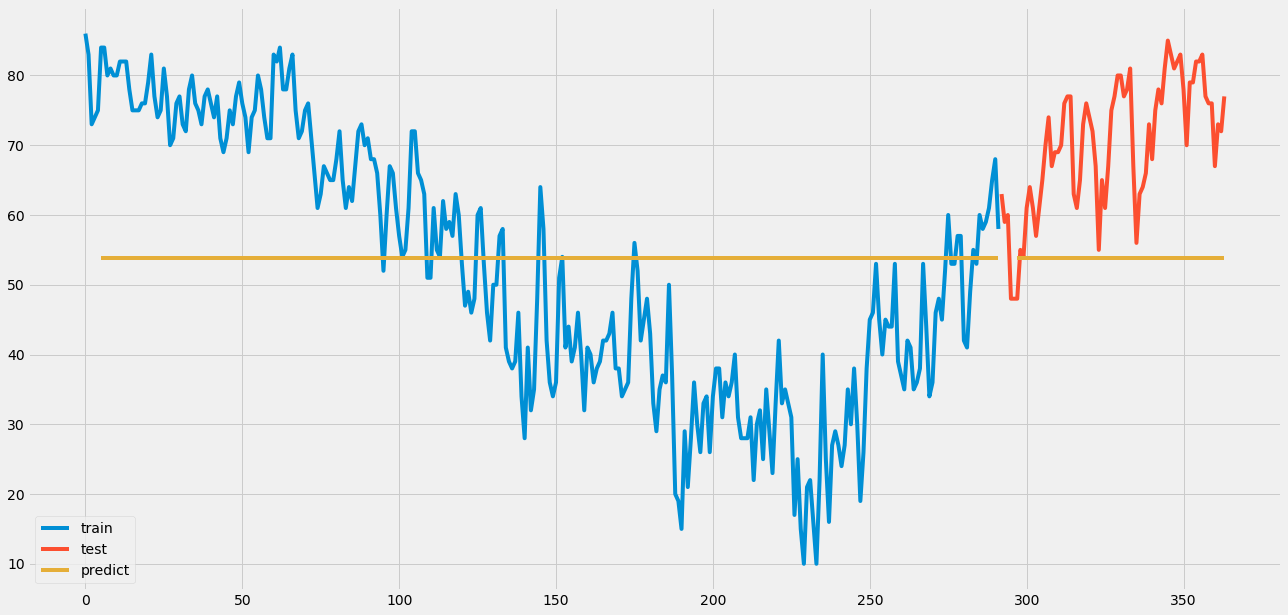

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2692 - val_loss: 0.2802
Epoch 2/10
 - 0s - loss: 0.2480 - val_loss: 0.2407
Epoch 3/10
 - 0s - loss: 0.2344 - val_loss: 0.1002
Epoch 4/10
 - 0s - loss: 0.2364 - val_loss: 0.2480
Epoch 5/10
 - 0s - loss: 0.2431 - val_loss: 0.2877
Epoch 6/10
 - 0s - loss: 0.2396 - val_loss: 0.3047
Epoch 7/10
 - 0s - loss: 0.2417 - val_loss: 0.3006
Epoch 8/10
 - 0s - loss: 0.2280 - val_loss: 0.2212
Epoch 9/10
 - 0s - loss: 0.2377 - val_loss: 0.3659
Epoch 10/10
 - 0s - loss: 0.2305 - val_loss: 0.2110


'Train Error: 16.7774189274  Num NaN: 5'

'Test Error: 15.8233018562    Num NaN: 5'

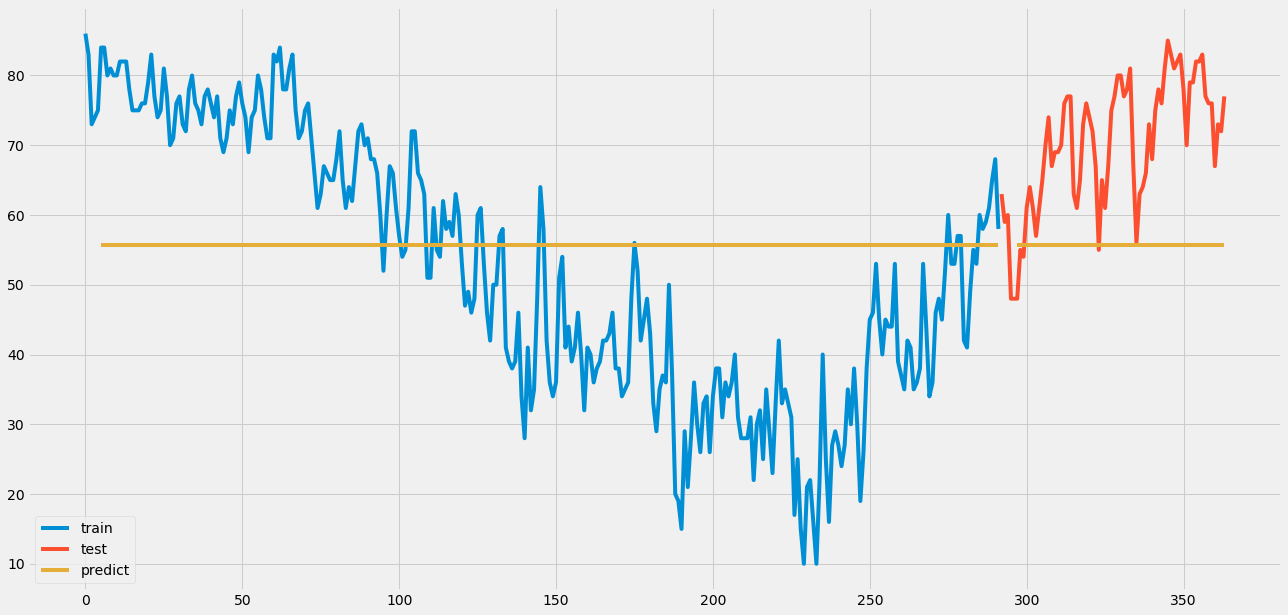

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.7056 - val_loss: 0.5677
Epoch 2/10
 - 0s - loss: 0.5051 - val_loss: 0.4331
Epoch 3/10
 - 0s - loss: 0.3896 - val_loss: 0.3396
Epoch 4/10
 - 0s - loss: 0.3066 - val_loss: 0.2695
Epoch 5/10
 - 0s - loss: 0.2435 - val_loss: 0.2152
Epoch 6/10
 - 0s - loss: 0.1944 - val_loss: 0.1725
Epoch 7/10
 - 0s - loss: 0.1554 - val_loss: 0.1385
Epoch 8/10
 - 0s - loss: 0.1244 - val_loss: 0.1112
Epoch 9/10
 - 0s - loss: 0.0998 - val_loss: 0.0912
Epoch 10/10
 - 0s - loss: 0.0830 - val_loss: 0.0770


'Train Error: 754.04957915  Num NaN: 0'

'Test Error: 775.616886563    Num NaN: 0'

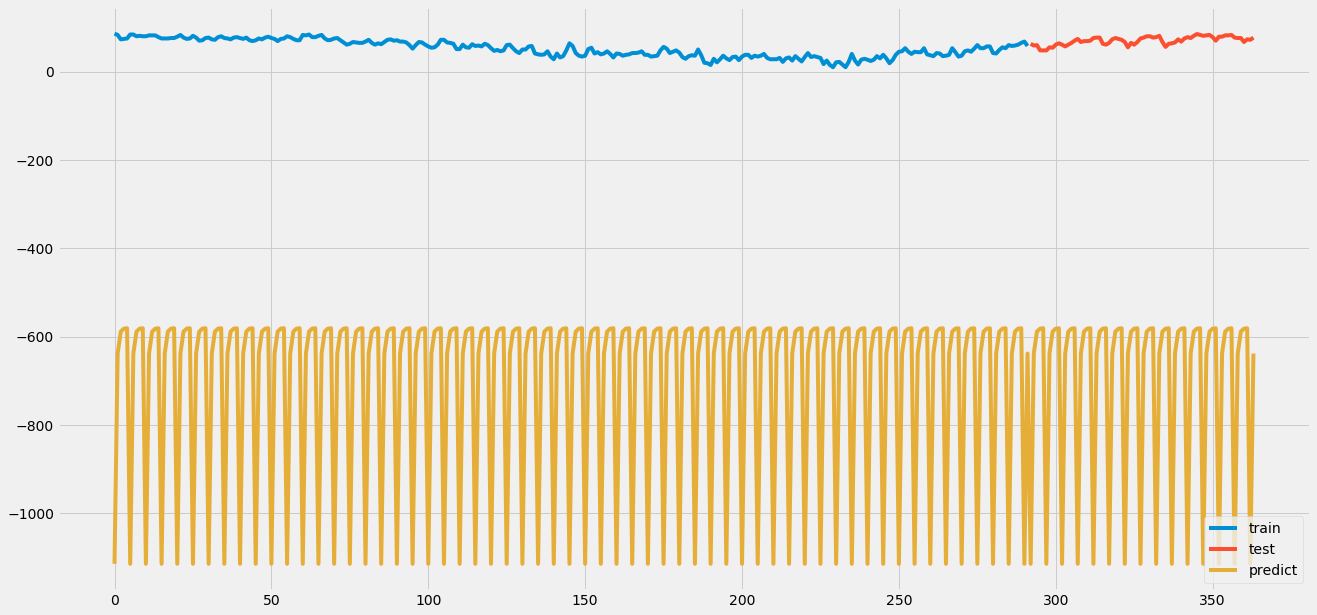

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 0.8928 - val_loss: 0.8306
Epoch 2/10
 - 1s - loss: 0.8283 - val_loss: 0.7928
Epoch 3/10
 - 1s - loss: 0.7905 - val_loss: 0.7621
Epoch 4/10
 - 1s - loss: 0.7598 - val_loss: 0.7355
Epoch 5/10
 - 1s - loss: 0.7332 - val_loss: 0.7115
Epoch 6/10
 - 1s - loss: 0.7092 - val_loss: 0.6895
Epoch 7/10
 - 1s - loss: 0.6872 - val_loss: 0.6690
Epoch 8/10
 - 1s - loss: 0.6668 - val_loss: 0.6498
Epoch 9/10
 - 1s - loss: 0.6475 - val_loss: 0.6348
Epoch 10/10
 - 1s - loss: 0.6325 - val_loss: 0.6206


'Train Error: 6236.08991398  Num NaN: 0'

'Test Error: 6258.84473334    Num NaN: 0'

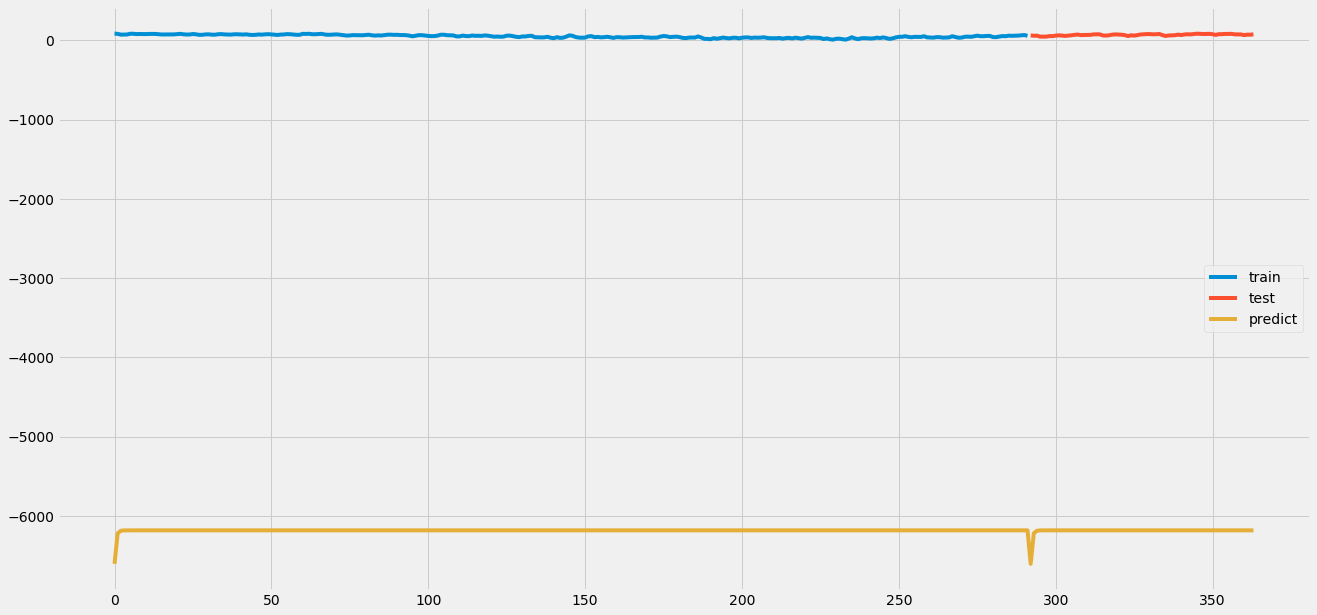

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')